<br>

# Heap Sort Algorithm

###### Author: Keelan duddy 

#### Imports needed:


import matplotlib.pyplot as plt 

import networkx as nx

import math

from timeit import default_timer as clock

<br>
<br>
<br>

# Introduction


I am writing this notebook to have an in depth look into the inner workings of the Heap sort sorting algorithm. This notebook will contain the inner workings of heapsort, an Implementation of it, it's complexity and why using graph theory is great to show heapsort off.

# What is Heap sort Algorithm?
<br>
<br>
<br>

## Data Structures and Algorithms


To understand what heap sort algorithm is, we must know what an algorithm is within computer science. On wikipedia an algorithm is described as ["a finite sequence of well-defined instructions, typically used to solve a class of specific problems or to perform a computation."](https://en.wikipedia.org/wiki/Algorithm) [1]

Meaning algorithms give you the implementation to solve a particular problem. In this context, algorithms are used to define data structures and their operations. 

Data structures are a ["management, and storage format that enables efficient access and modification"](https://en.wikipedia.org/wiki/Data_structure)[2] according to wikipedia.

So putting these two together, algorithms determine the way data is organised from these data structures.

Heap sort is one of many sorting algorithms, it is one of most known due to it's performance being that it's best and worst case scenario can be both [O(n log n)](https://en.wikipedia.org/wiki/Heapsort)[3].


## Heap

To understand heapsort, you must understand heap first as well.

Heaps are <b>binary trees</b> with nodes that can have at most two children and which must satisfy two properties.

<b>(1)</b>The first being a structual property. In this the tree must satisfy by being <b>complete</b>.It is considered complete when "A heap with height H is a complete binary tree if all the levels have the maximal number of nodes possible, and the remaining nodes at level H reside in the leftmost possible positions at that level."[[4]](https://books.google.ie/books?id=UqmYAgAAQBAJ&printsec=frontcover&dq=data+structures+and+algorithms&hl=en&sa=X&ved=2ahUKEwjT0pD3yM72AhVGasAKHYUfAMUQ6AF6BAgGEAI#v=onepage&q=data%20structures%20and%20algorithms&f=false) 


<b>(2)</b>The second being heap-order property. Which is described as:<br>
The parent node is less than or equal to a child node = <b>min heap.</b><br>
The parent node is greater than or equal to a child node = <b>max heap.</b> [[9]](https://www.geeksforgeeks.org/difference-between-min-heap-and-max-heap/)

This means the root node of the tree is either the largest or smallest element that is in the data structure. With heap sort algorithm it uses a <b>Max Heap.</b> [[4]](https://books.google.ie/books?id=UqmYAgAAQBAJ&printsec=frontcover&dq=data+structures+and+algorithms&hl=en&sa=X&ved=2ahUKEwjT0pD3yM72AhVGasAKHYUfAMUQ6AF6BAgGEAI#v=onepage&q=data%20structures%20and%20algorithms&f=false)





##### Complete binary tree (1)

In a complete binary tree, every level has to be filled with nodes, except the lowest level of the tree. 

However, it is vital to note that any nodes at the lowest level of the tree must lean to the left in order to be a complete binary tree as shown in the diagram below. 

Without any gaps between nodes, the tree will be balanced and therefore, allow heap to be represented efficiently in an array. In a complete binary tree the height of the heap is log N. [Complete binary tree [7]](https://www.baeldung.com/cs/heap-vs-binary-search-tree)

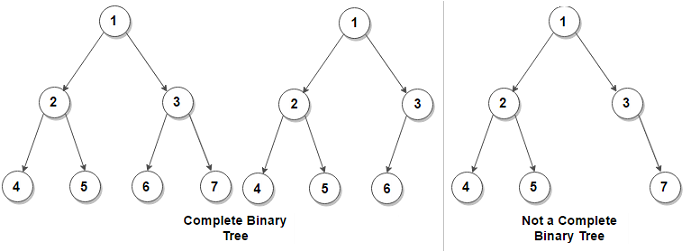

##### Max & Min heap (2)

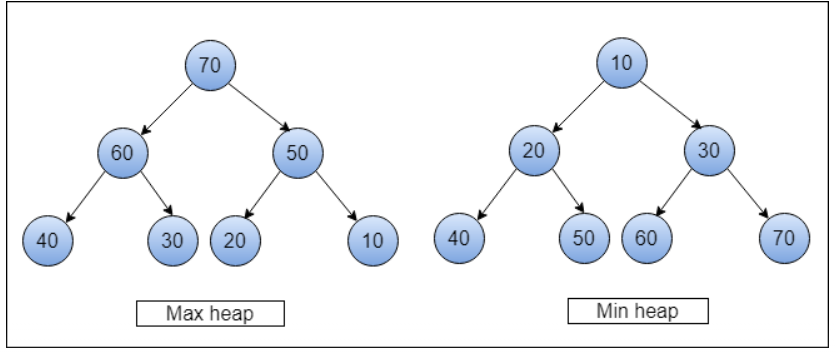

In this complete binary tree diagram [[5]](https://medium.com/@mopurisreenath/what-is-binary-heap-25cd0f8bed24).

On the left side of the diagram, the root or parent node must be greater or equal to the value of its child nodes while the root has the largest number, this heap is known as Max-Heap. 

On the right side of the diagram, the root or parent node must be less or equal to the value of its child nodes while the root has the smallest number, this heap is known as Min-Heap.[[9]](https://www.geeksforgeeks.org/difference-between-min-heap-and-max-heap/)

##### Finding parent and child nodes in Heap

As shown above, heap is a complete binary tree, hence, below will show how to find the location of a parent node and children nodes of a heap.

Left child of a node (i) will be at (2 x i) + 1 and the right child of a node (i) will be at position (2 x i) +2 <br>
The parent of a node will be at position at floor((i - 1) ÷ 2)

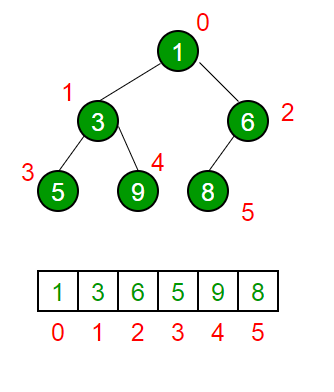

Index number are coloured in <b>RED</b> and the int value within are coloured <b>WHITE</b>.

In the diagram, above the node with the value 3 inside has the index of 1. i= 1

Find children:
<b>Left Child</b>of index 1: (2xi)+1 = (2x1)+1= 3 index. <br>
<b>Right Child</b> of index 1: (2xi)+2 = (2x1)+2 = 4 index.


This shows that index 3 with the value 5 is the left child of index 1. <br>
Index 4 with value 9 is the right child to index 1. <br>

To find the parent of index 3 and 4:


Parent of index 3: floor((i-1)÷2) = floor((3-1)÷2) = floor(1) = index 1.<br>


Parent of index 4: floor((i-1)÷2) = floor((4-1)÷2) = floor(1.5) = index 1.

This shows that index 3 & 4 parent is index 1.

[Reference [10]](https://www.geeksforgeeks.org/binary-heap/)


## Binary Tree




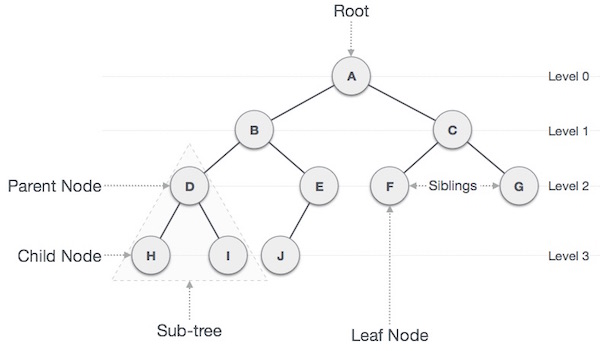

[-Diagram [8]](https://www.tutorialspoint.com/data_structures_algorithms/tree_data_structure.htm)

With heap being an ordered tree based structure, it is usually implemented using a binary tree. 

A binary tree is a tree-type non-linear data structure which consists of nodes that linked by edges. Each node can only have at most two children. Every node in a binary tree has a left and right reference along with the data element. The node at the top of the hierarchy of a tree is called the root node. The nodes that hold other sub-nodes are the parent nodes.

types of nodes:
- Root Node: the one located at the top of the tree.
- child node: A sub-node that is connected by an edge from a parent node.
- parent node:  Any nodes (excluding the root) that has at least one child node (sub-node).
- leaf node: Descendants of a parent node. 

[Reference [8]](https://www.tutorialspoint.com/data_structures_algorithms/tree_data_structure.htm)


###### Summary

Now that we have explained what heap, binary tree and min/max heaps are. I can now discuss how these relate to the heap sort algorithm. Heap sort is a comparison based sorting algorithm due to it's implementation of the binary heap data structure. Heap sort builds a max-heap it does this by using the finding child node formula I show above. Heapsort then takes the root element of the binary tree and the lowest valued node at the end and swaps them. It then decreases the heap by 1. Then repeats the whole process again until the heap is empty. I show a step by step example at the bottom of this notebook.

So in summary what heap-sort divides its input into a sorted and an unsorted region, and it iteratively shrinks the unsorted region by extracting the largest element from it and inserting it into the sorted region.

<br>
<br>
<br>
<br>
<br>

## Implementation of Heap Sort

When it comes to the Heap Sort algorithm there are 2 main functions at work.

1. heapify
2. heapSort


##### heapify

In the heapify function we create a Max heap, it does this by comparing the value of the parent nodes with their children. If the value of the child is bigger than the parent, they get swapped. This is continued till all the parent nodes have a bigger value than their children. Pushing the lower values down the tree is known as sifting down. The formula for this i showed above at "finding parent and child nodes in a heap".  [heapsort [3]](https://en.wikipedia.org/wiki/Heapsort)

##### heapSort

Once when the tree is a max heap heap sort performs these actions.

When max heap is performed the largest vaule is at the root node heap sort swaps the root value with the last nodes value (which is the smallest value at the time) once this is done, that last node is cut off. Then the heapify process is repeated along with the heap sort afterwards. 

This is continued until the smallest value is at the root/ start of an array and each increasing value is placed in the right  order according to it's size with the largest value being at last node/end of an array. [heapsort [3]](https://en.wikipedia.org/wiki/Heapsort)

In [1]:
def heapify(array, l, r): # array, length, root
         
    # Find biggest value among root and children
    biggest = r

    # Finding the children of the root.
    left = 2 * r + 1
    
    right = 2 * r + 2

    # check if the left child of the root is there and if it is greater value than the root
    if left < l and array[r] < array[left]:
        
        biggest = left

    # check if the right child of the root is there and if it is greater value than the root
    if right < l and array[biggest] < array[right]:
        
        biggest = right

    # we must check If the root is not the largest, swap and proceed to heapify
    if (biggest != r):
        
        array[r], array[biggest] = array[biggest], array[r]

        # re-call function 
        heapify(array, l, biggest)




# Credit Dr Ian McLoughlin.

In [2]:
def heapSort(array): 
    
    # gets the size of the array being passed down
    s = len(array) 
  
    
    # goes through the values and heapifys them. The resulting list of elements will be a max heap
    for i in range(s//2, -1, -1):  # s//2 floors the value
        
        heapify(array, s, i) 
  
    # One by one extract elements 
    for i in range(s-1, 0, -1): 
        
        #swaps
        array[i], array[0] = array[0], array[i] 

        #Heapify root 
        heapify(array, i, 0) 
        
        
# Credit Dr Ian McLoughlin.

In [3]:
# Example result

array = [55,66,2,1,5,89,33,12,10,98,23,36]

print("Array before heapsort:")
print(array)# prints array before going through heapsort function

print("Array after heapsort:")


size = len(array) # gets length of array

heapSort(array)# calls function on array

for i in range(size):
    print("%d " % array[i], end='') # prints out the array after going through heapsort

Array before heapsort:
[55, 66, 2, 1, 5, 89, 33, 12, 10, 98, 23, 36]
Array after heapsort:
1 2 5 10 12 23 33 36 55 66 89 98 

<br>

## Heap Sort Algorithm Complexity 

Before we can talk about the complexity of the heap sort algorithm, we need to know what Big O notation means in terms of computer science. Big O notation is one of the most fundamental tools for computer scientists to analyze the cost of an algorithm. 

Big O notation is used to describe the complexity of an algorithm when measuring its efficiency, which in this case means how well the algorithm scales with the size of the dataset. 

Big O is represented with the following syntax: O(n). <b>N</b> indicates the size of the algorithm's input. The algorithm is a function, and n refers to the size of a collection taken by the function as its input. The value between the parentheses expresses that function's complexity in terms of n. 

Complexity is measured in two dimensions: 

<b>Time</b> = How long a function takes to complete.

<b>Space</b> = How much memory a function consumes while executing. 

[ Reference [12]](https://guides.codepath.com/compsci/Big-O-Complexity-Analysis#:~:text=Big%20O%20notation%20is%20used,the%20size%20of%20the%20dataset.)

The 2 diagrams belows show some of Big O notations and their performances:


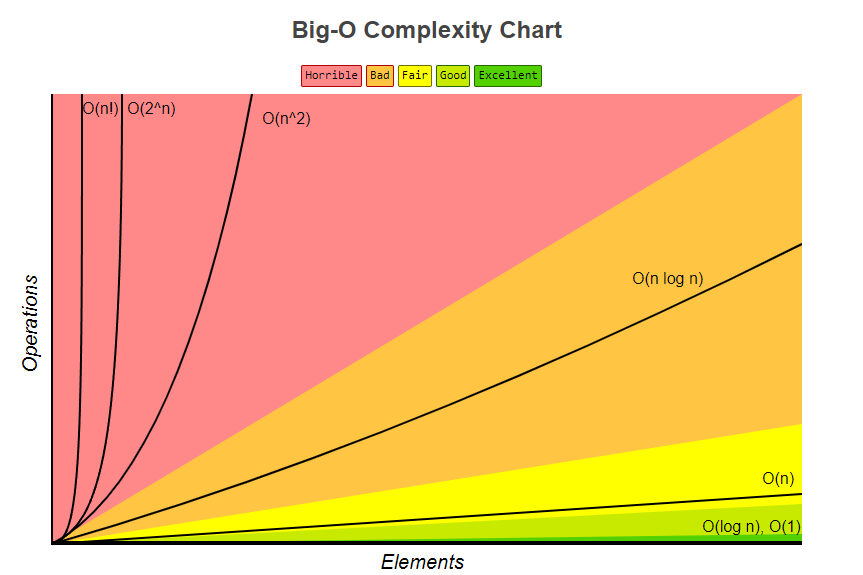

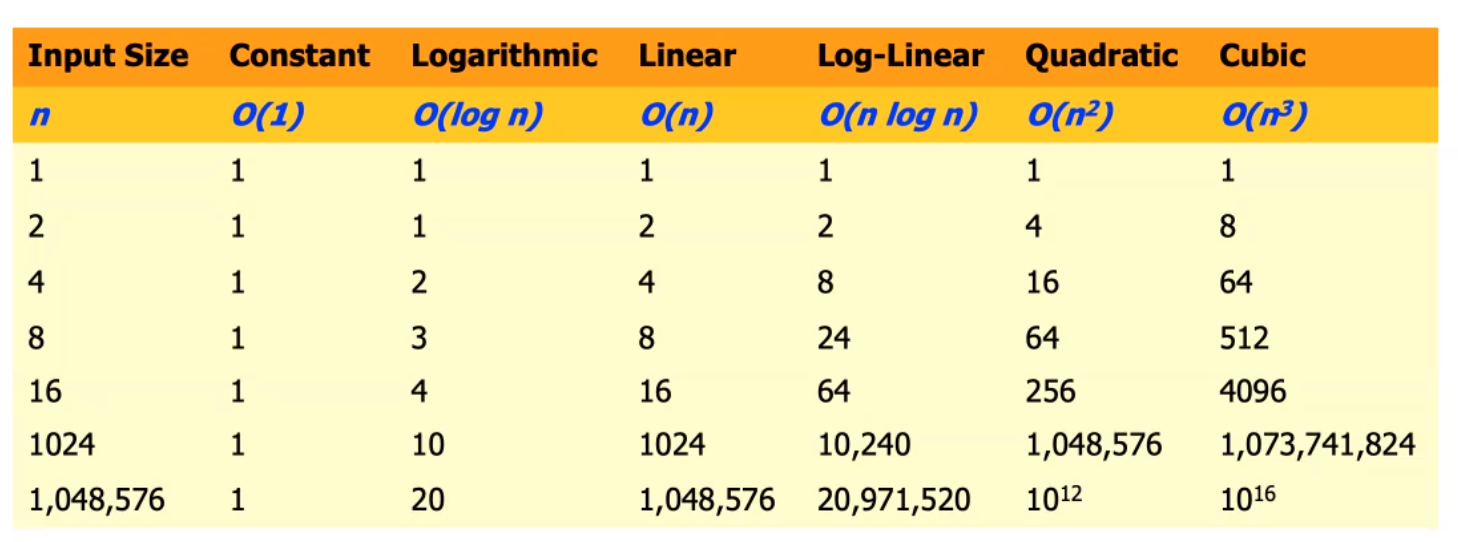

When it comes to heapsort it's best case and worst case performances are both O(n log n). Which means that it has the advantage of a more favorable worst-case O(n log n) runtime than other sorting algorithms. [[3]](https://en.wikipedia.org/wiki/Heapsort)

### How HeapSort is O(n log n):

To start off with, the height of complete binary tree proves that the height of a heap is log N. 

In heap sort, you build a max heap and then extract the root element one by one, after every extraction you make the last element as root and then run the heapify() procedure. The heapify procedure takes O(log n), time. 

Also, you do this heapify procedure n times(one time for each element), so <b>Time complexity</b> becomes O(n log n).[[19]](https://medium.com/@angeloacebedo/run-time-analysis-heap-sort-8b81d6403508) 


##### Explaining in further detail:

<b>Heapify</b> - O(log n) = 

Each time we call this function it is to ensure that the heap satisfies its relational property by making a max heap. This run time is <b>O(log n).</b> The swap of with the root is made and then the heap is decreased in size by one. This means there is one less node each time heapify is called, the level of the heap shrinks the amount of swaps shrink.

As I mentioned before the height of a complete binary tree is log n. n is the number of nodes, so the amount of swaps which can be done depends on the height of the tree. So heapify makes a total of h = log(n) swaps.

<b>heapsort</b> =

When making the initial max heap with this function it has a run time of <b>O(n)</b> and n being the number of nodes.The root element and last element are swapped meaning heapify must be called again to create a max heap. So you have n number of times you need to call heapify making the <b>Time complexity</b> of these 2 functions together <b>O(n) X O(log n) = O(n log n) </b>

The <b> Space Complexity </b>:

Heapsort is an in-place designed sorting algorithm, the space requirement is constant meaning it's O(1). 
This is because, in case of any input it arranges all the list items in place using a heap structure and puts the removed items at the end of the same list after removing the max node from the max-heap.

This means we don't use any extra space when implementing the heapsort algorithm. This gives the algorithm a <b>Space Complexity </b> of O(1). [[18]](https://iq.opengenus.org/time-complexity-of-heap-sort/)



## Heap sort when sorting sorted or unsorted data at runtime

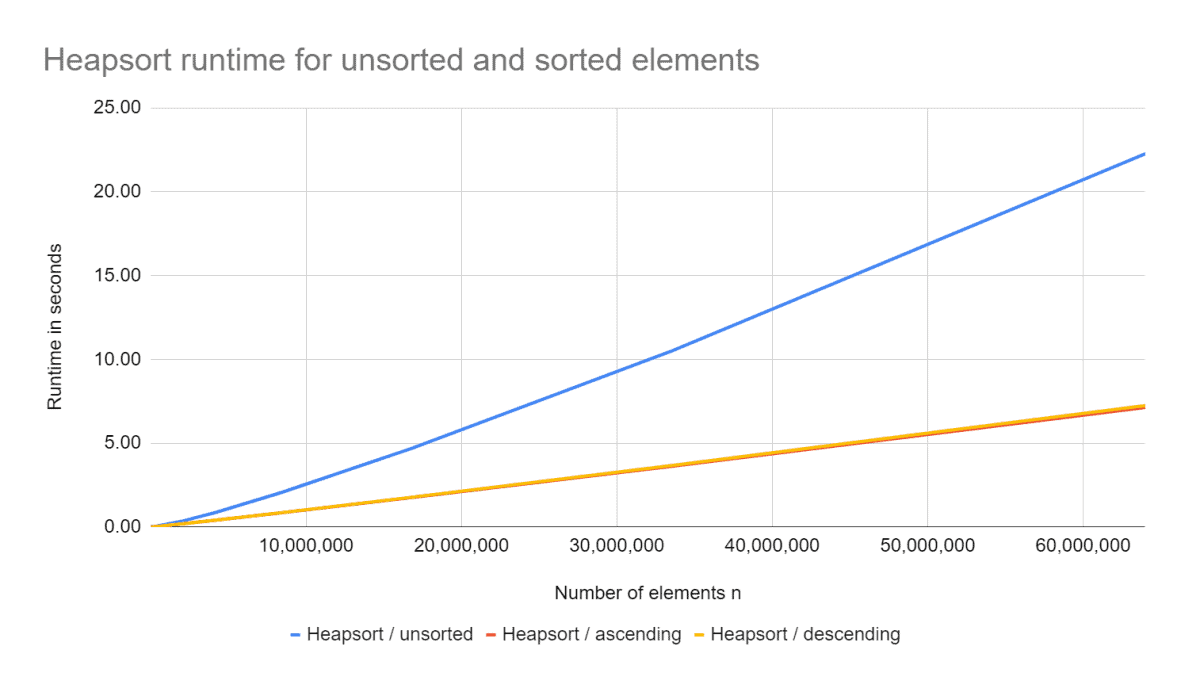

What the above diagram shows about heapsort is:

 For presorted input data, Heapsort is about 3 times quicker than for when it's unsorted data. When doubling the input quantity, sorting takes more than twice as long; this makes sense with the expected runtime O(n log n). Input data sorted in ascending order is sorted in about the same speed as input data sorted in descending order. [[16]](https://www.happycoders.eu/algorithms/heapsort/)

## Heap Sort vs Other Efficient Sorting Algorithms

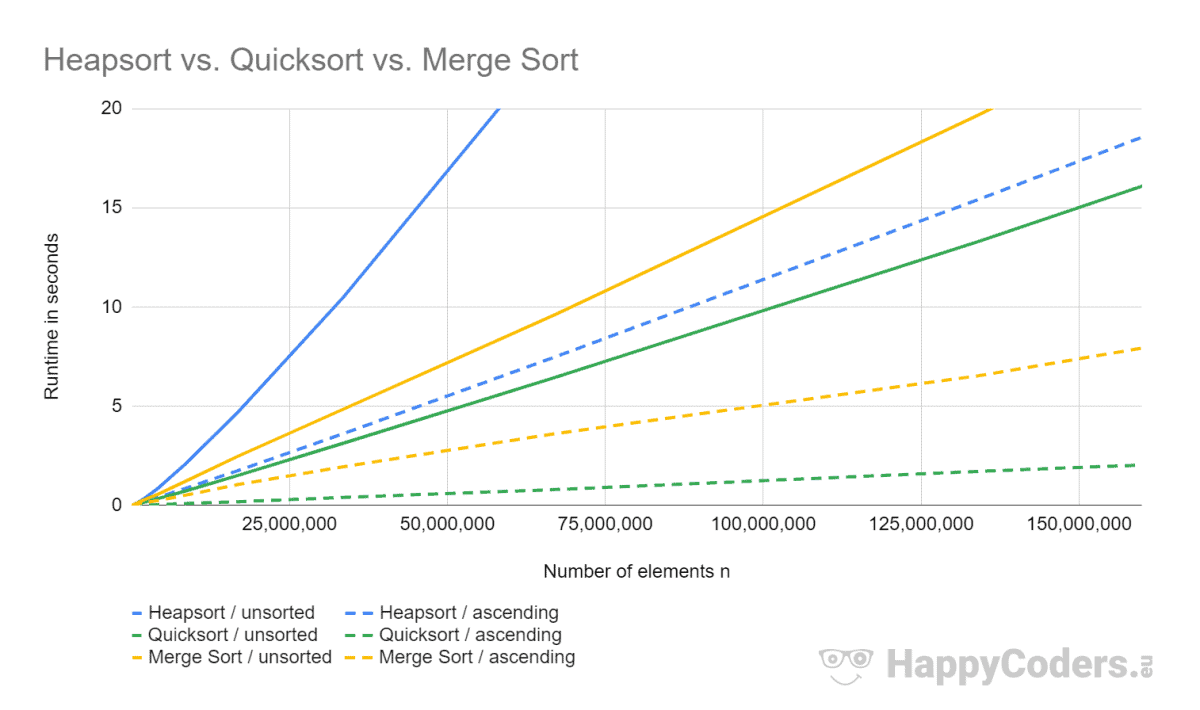

What the above diagram shows is that Heapsort is slower than Quicksort and slower than Merge Sort  or randomly distributed input data. For sorted data, heapsort is up to 9 times slower than quicksort and 2 times slower than Merge Sort. 

<b>Heapsort vs quicksort: </b> quicksort is a lot faster than heapsort but due to quicksort having its worst-case be O(n²), heapsort may get used over it at times. 

<b>Heapsort vs merge sort:</b> Merge sort is faster and more stable than heapsort. However, Merge sort requires additional memory unlike heapsort which doesn't.[[16]](https://www.happycoders.eu/algorithms/heapsort/)

#### Summary
The Heap sort algorithm exhibits consistent performance. This means it performs equally well in the best, average and worst cases. Because of its guaranteed performance, it is particularly suitable to use in systems with vital response time.[[17]](https://sciencing.com/the-advantages-of-heap-sort-12749895.html)


### Heapsort vs Quicksort & Merge sort Implementation

###### Merge sort
[[Reference 20]](https://www.geeksforgeeks.org/merge-sort/)

In [4]:
def mergeSort(myList):
    if len(myList) > 1:
        mid = len(myList) // 2
        left = myList[:mid]
        right = myList[mid:]

        # Recursive call on each half
        mergeSort(left)
        mergeSort(right)

        # Two iterators for traversing the two halves
        i = 0
        j = 0
        
        # Iterator for the main list
        k = 0
        
        while i < len(left) and j < len(right):
            if left[i] <= right[j]:
              # The value from the left half has been used
              myList[k] = left[i]
              # Move the iterator forward
              i += 1
            else:
                myList[k] = right[j]
                j += 1
            # Move to the next slot
            k += 1

        # For all the remaining values
        while i < len(left):
            myList[k] = left[i]
            i += 1
            k += 1

        while j < len(right):
            myList[k]=right[j]
            j += 1
            k += 1



###### Quick sort

[[Reference 21]](https://www.geeksforgeeks.org/python-program-for-quicksort/)

In [5]:
def QuickSort(arr):

    elements = len(arr)
    
    #Base case
    if elements < 2:
        return arr
    
    current_position = 0 #Position of the partitioning element

    for i in range(1, elements): #Partitioning loop
         if arr[i] <= arr[0]:
              current_position += 1
              temp = arr[i]
              arr[i] = arr[current_position]
              arr[current_position] = temp

    temp = arr[0]
    arr[0] = arr[current_position] 
    arr[current_position] = temp #Brings pivot to it's appropriate position
    
    left = QuickSort(arr[0:current_position]) #Sorts the elements to the left of pivot
    right = QuickSort(arr[current_position+1:elements]) #sorts the elements to the right of pivot

    arr = left + [arr[current_position]] + right #Merging everything together
    
    return arr





### Comparison

In [6]:
from timeit import default_timer as timer

# list array for all 3 sorting algorithms
myList = [54,26,93,17,77,31,44,55,20]

n = len(myList) # gets the size of array

#Output of original list
print("Original list:")
for i in range(n):
    print("%d " % myList[i], end='')

# getting the time
start=timer();
heapSort(myList)
end=timer();

#final time
time1=end-start

#Output sorted list
print("\n\n Heap Sort= Sorted list:")
for i in range(n):
  print("%d " % myList[i], end='')

print("\n\nTime to finish: \n", time1)




Original list:
54 26 93 17 77 31 44 55 20 

 Heap Sort= Sorted list:
17 20 26 31 44 54 55 77 93 

Time to finish: 
 0.0001647000000000176


In [7]:
#getting the time
s=timer();
mergeSort(myList)
e=timer();

#final time
time2=e-s

#Output sorted list
print("\n\n Merge Sort = Sorted list:")
for i in range(n):
  print("%d " % myList[i], end='')

print("\n\nTime to finish: \n", time2)



 Merge Sort = Sorted list:
17 20 26 31 44 54 55 77 93 

Time to finish: 
 0.0002615000000001366


In [8]:
#getting the time
s1=timer();
QuickSort(myList)
e1=timer();

#final time
time3=e1-s1

#Output sorted list
print("\n\n Quick Sort = Sorted list:")
for i in range(n):
  print("%d " % myList[i], end='')

print("\n\nTime to finish: \n", time3)



 Quick Sort = Sorted list:
17 20 26 31 44 54 55 77 93 

Time to finish: 
 0.00017209999999989734


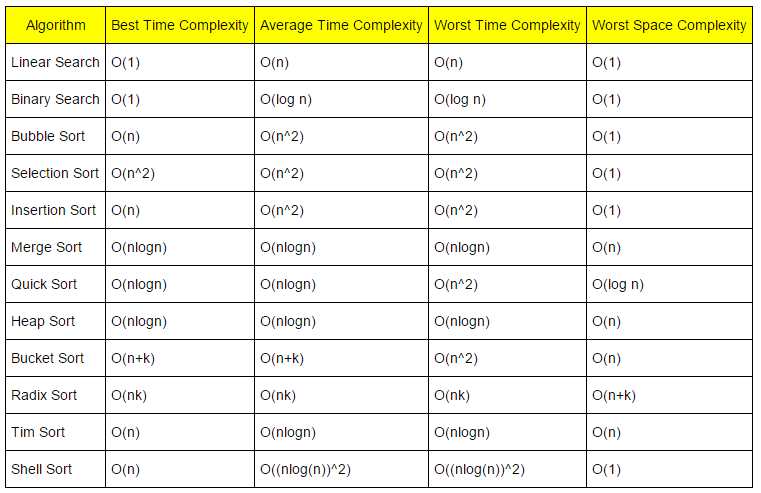

## Explanation of how graph theory is used in Heap Sort

Heap sort algorithm and algorithms in general aren't easy to explain and demonstrate how they work. In mathematics and computer science, an algorithm is a finite sequence of well-defined instructions, typically used to solve a class of specific problems or to perform a computation. So when you're trying to demonstrate its workings graph theory provides a helpful tool to quantify, simplify, and visualise the many moving parts of these type of dynamic systems. [[14]](https://towardsdatascience.com/what-is-graph-theory-and-why-should-you-care-28d6a715a5c2#:~:text=Graph%20Theory%20is%20ultimately%20the,moving%20parts%20of%20dynamic%20systems.)



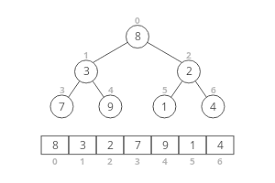

The above diagram shows how a binary tree graph which can represent an array of integers. To understand how the array is placed on the graph you must read the graph from left to right going down each row. <br>

### With the folowing examples below shows you how a graph can easily visualise what is happening in the Heap-Sort algorithm:

[8, 3, 2, 7, 9, 1, 4]


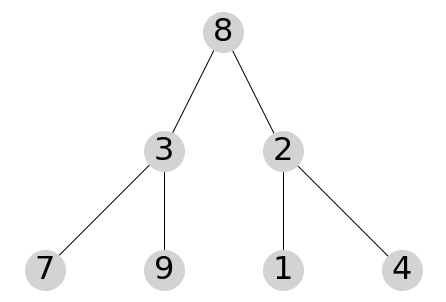

In [9]:
#imports
import matplotlib.pyplot as plt
import networkx as nx
import math

def draw(L, highlight=None):
    
  # Create a fully balanced binary tree.
  T = nx.balanced_tree(2, math.floor(math.log(len(L), 2)))
    
  # Remove nodes that arent the size of array
  T.remove_nodes_from(list(T.nodes)[len(L):])
    
  # labels with value
  T = nx.relabel_nodes(T, dict(zip(T.nodes, L)), copy=True)
    
  # positions for the nodes 
  pos = nx.drawing.nx_pydot.graphviz_layout(T, prog="dot")
    
  # Draw graph.
  nx.draw(T, pos, with_labels=True, node_color='lightgrey', node_size=1600, font_size=32)
    
  # Highlight nodes 
  if highlight:
    nx.draw_networkx(T.subgraph([i for i in T.nodes if i in highlight]), pos=pos, node_color='lightblue', node_size=1600, font_size=32)


# list 
L = [8,3,2,7,9,1,4]
# print array

print(L)
# Draw the tree from L.

draw(L)

# Credit Dr Ian McLoughlin.


Above is a function which demonstrates an array of Integers into a graph format. When an Array on Integer goes through the heapsort function, It is first put through heapify which makes it into a Max heap.



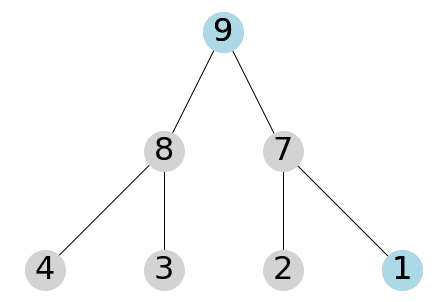

In [10]:
L= [9,8,7,4,3,2,1]

draw(L, [9,1])

The above graph now shows the array sorted into a max heap. The next stage is take the root node (9) and swap it with the lowest valued node (1).

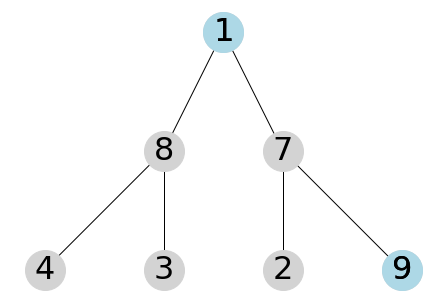

In [11]:
L = [1,8,7,4,3,2,9]

draw(L, [9,1])

Once they have been swapped, the largest vaule (9) which is at the last node now is removed before the next iteration of heapify.

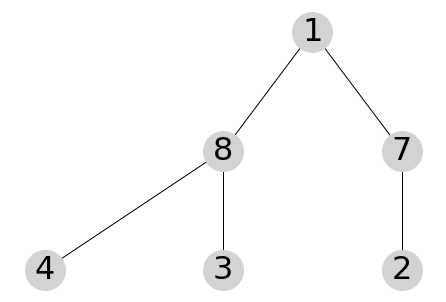

In [12]:
L = [1,8,7,4,3,2,]

draw(L)

The last node (which now contains the largest value) is cut off and this is again put through heapify. This process is continued until all the vaules are cut off and sorted.

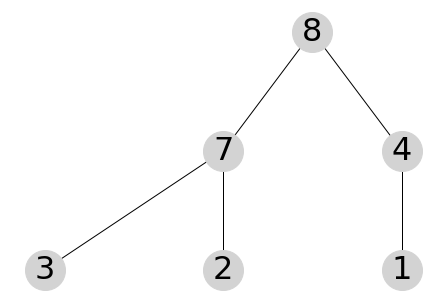

In [13]:
L = [ 8,7,4,3,2,1]
draw(L)

This is the result when put through heapify for the 2nd time. <br>
<br>

This whole process is repeated until you get the same results shown below.



Before: [8, 3, 2, 7, 9, 1, 4]
After: [1, 2, 3, 4, 7, 8, 9]


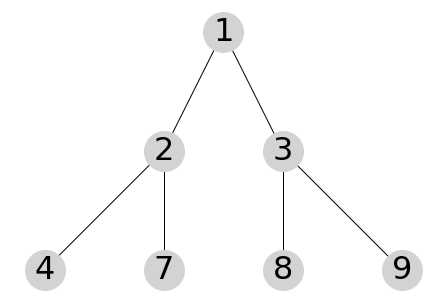

In [14]:
L = [8,3,2,7,9,1,4]

print("Before:", L)

heapSort(L)

print("After:", L)

draw(L)

The above shows what the graph looks like when it's been fully heapsorted. Using graphs I was able to visualise and explain step by step the process of the heap-sort algorithm. 

Using graph theory we are able to clearly show and understand the entire process of heap sort. At the start of this notebook I was able to visually show what a binary tree, min/max heaps are using graphs this greatly helped get an understanding of the behind the scene workings of heapsort. Graphs allowed me to show step by step the process of heapsort. Graphs can remain mathematically correct to the corresponding data structures that it shows. Graph theory is the study of relationships given to sets of nodes and connections which can abstract and visualise anything from computer science and mathematics. It helps us to understand and study these complex fields and make our own analysis of their topics.

   # References

https://en.wikipedia.org/wiki/Algorithm [1] <br>
https://en.wikipedia.org/wiki/Data_structure [2]<br>
https://en.wikipedia.org/wiki/Heapsort [3]<br>


Data Structures and Algorithms in Java by Michael T. Goodrich
https://books.google.ie/books?id=UqmYAgAAQBAJ&printsec=frontcover&dq=data+structures+and+algorithms&hl=en&sa=X&ved=2ahUKEwjT0pD3yM72AhVGasAKHYUfAMUQ6AF6BAgGEAI#v=onepage&q=data%20structures%20and%20algorithms&f=false  [4]<br>

What is a binary heap 
https://medium.com/@mopurisreenath/what-is-binary-heap-25cd0f8bed24 [5]<br>

complete binary tree
https://www.techiedelight.com/check-given-binary-tree-complete-binary-tree-not/ [6] <br>

https://www.baeldung.com/cs/heap-vs-binary-search-tree [7] <br>

binary tree data structure and algorithms https://www.tutorialspoint.com/data_structures_algorithms/tree_data_structure.htm [8] <br>

max and min heap https://www.geeksforgeeks.org/difference-between-min-heap-and-max-heap/ [9] <br>

binary heap geeks https://www.geeksforgeeks.org/binary-heap/ [10] <br>

big o notation https://www.freecodecamp.org/news/big-o-notation-why-it-matters-and-why-it-doesnt-1674cfa8a23c/ [11] <br>

big o complexity https://guides.codepath.com/compsci/Big-O-Complexity-Analysis#:~:text=Big%20O%20notation%20is%20used,the%20size%20of%20the%20dataset. [12] <br>

heapsort o(n log n) https://www.quora.com/How-does-Heapsort-take-O-nlogn-time [13] <br>

what is graph theory and why we should care https://towardsdatascience.com/what-is-graph-theory-and-why-should-you-care-28d6a715a5c2#:~:text=Graph%20Theory%20is%20ultimately%20the,moving%20parts%20of%20dynamic%20systems. [14] <br>

Dr Ian McLoughlin. [15] <br>

heapsort complexity https://www.happycoders.eu/algorithms/heapsort/ [16] <br>

Sciencing https://sciencing.com/the-advantages-of-heap-sort-12749895.html [17] <br>

opengenus Time & Space Complexity of Heap Sort https://iq.opengenus.org/time-complexity-of-heap-sort/ [18] <br>

run time analysis of heapsort https://medium.com/@angeloacebedo/run-time-analysis-heap-sort-8b81d6403508  [19]<br>

merge sort https://www.geeksforgeeks.org/merge-sort/ [20]

quicksort https://www.geeksforgeeks.org/python-program-for-quicksort/ [21]